In [63]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np
from qiskit import *
%matplotlib inline

Credentials are already in use. The existing account in the session will be replaced.


In [64]:
circ = QuantumCircuit(3)

In [65]:
circ.h(0)
circ.cx(1, 2)
circ.cx(2, 0)
circ.cx(1, 2)

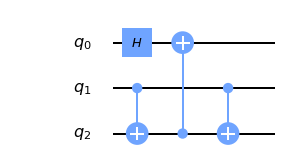

In [66]:
circ.draw()

In [67]:
backend = Aer.get_backend('statevector_simulator')

In [68]:
job = execute(circ, backend)

In [69]:
result = job.result()
print(result)

Result(backend_name='statevector_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 23, 18, 58, 18, 899379), header=Obj(backend_name='statevector_simulator', backend_version='0.4.1'), job_id='8e2ef9a8-4741-4f24-abd1-91158ee4fcdd', metadata={'max_memory_mb': 16081, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000164184}, qobj_id='99bc72f1-e11c-45f8-ac0c-a0f18f9b081d', results=[ExperimentResult(data=ExperimentResultData(statevector=array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=3, name='circuit18', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=4097936153, shots=1, status='DONE', success=True, time_taken=7.9876e-05)], status='COMPLETED', success=True, time

In [70]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


[0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]
 
 Przedstawienie stan w postaci amplitud a = 0.707 b = 0.707 pozostałe 0

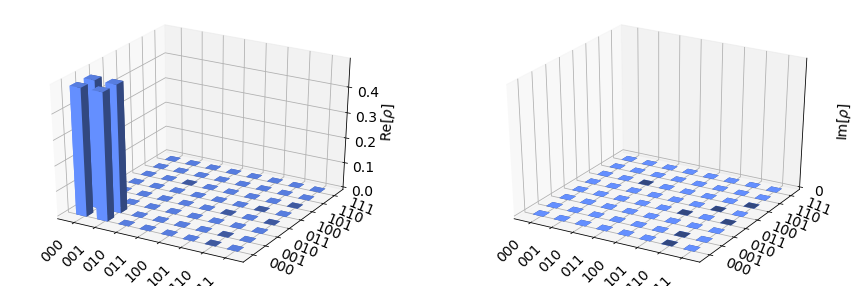

In [71]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

a^2 = 0.5 b^2 = 0.5  a'b = 0.5 ab' = 0.5 podstawiając do macierzy gęstości otrzymamy macierz przedstawiną powyżej

In [79]:
circReal = QuantumCircuit(3)

circReal.h(0)
circReal.cx(1, 2)
circReal.cx(2, 0)
circReal.cx(1, 2)
circReal.measure_all()

provider = IBMQ.get_provider(group='open')

Result(backend_name='ibmq_qasm_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 23, 19, 2, 19, 408042), header=Obj(backend_name='ibmq_qasm_simulator', backend_version='0.1.547'), job_id='5e7907b84165c20011c7529f', metadata={'max_memory_mb': 257942, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.005624874}, qobj_id='3daa9644-6e9d-4443-ac25-dbf5b93541d3', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=508, 0x1=516)), header=Obj(clbit_labels=[['measure', 0], ['measure', 1], ['measure', 2]], creg_sizes=[['measure', 3]], memory_slots=3, n_qubits=3, name='circuit25', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 16}, seed_simulator=163553006, shots=1024, status='DONE', success=True, time_taken=0.005458246)], status='COMPLETED', success=True, time_taken=0.005624874)
{'000'

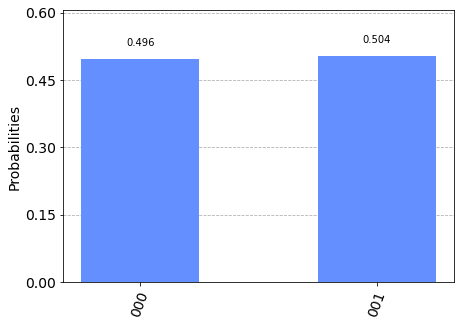

In [76]:
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(circReal, backend)
result = job.result()

counts = result.get_counts(circReal)

from qiskit.visualization import plot_histogram
plot_histogram(counts)


Symulacja na symulatorze została wywołana 1024 razy. Dodanie pomiaru sprawiło, że za każdym razem otrzymaliśmy konkretny stan, zatem stosunek jednego stanu do drugiego nigdy nie będzie wynosił dokładnie 50/50. W symuletorze otrzymujemy tylko stany czyste. 

In [77]:
backend_sim = provider.get_backend('ibmq_london')
job_sim = execute(circReal, backend_sim, shots=1024)
result = job.result()
result_sim = job_sim.result()

{'000': 529, '010': 3, '100': 16, '001': 427, '101': 12, '111': 14, '011': 7, '110': 16}


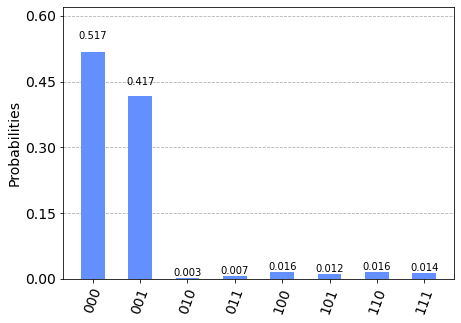

In [78]:
counts = result_sim.get_counts(circReal)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Na komputerze rzeczywistym mogą pojawić się błędy (zjawisko dekocherencji) przez co możemy otrzymać stany, które nie wystąpią w symultorze. Stany w komputereze k